# Red convolucional básica.


Una de las técnicas más usadas para estimar los parámetros de una red neuronal es el gradiente descendente, el cual es un algoritmo iterativo donde el valor de los parámetros en la iteración actual depende del valor en la iteración pasada y del valor de los gradientes.


$$w^{(t)} = w^{(t-1)} - \eta\frac{\partial J(w)}{\partial w},$$


donde $\eta$ es el factor de aprendizaje y $J(w)$ es la función de pérdida. El cálculo de las derivadas se hace a partir de los datos de entrenamiento y dependiendo de la proporción de los datos de datos entrenamiento que usemos en dicho cálculo, se reconocen tres enfoques:


1. Gradiente descendente por lotes.
2. Gradiente descendente estocástico.
3. Gradiente descendente por mini-lotes.


En este documento explicaremos, a partir de un ejemplo práctico, las principales ventajas y desventajas de cada enfoque.



## Etapa 1: Definición de los datos.


Antes de comenzar con el estudio de los tres enfoques de optimización, definimos la base de datos de interés. Para este caso particular, usaremos una base de datos sintética con dos atributos y que configura un problema de clasificación con 3 clases ([Ver enlace](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html))



Se cargan las librerías necesarias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Se crea la base de datos y se divide en los conjuntos de entrenamiento y prueba. Se definen 1000 muestras de las cuales el 80% se usa en el entrenamiento y el 20% restante para el conjunto de prueba.

In [2]:
n = 1000
classes = 3
dimensions = 2

train_size = int(n * 0.8)

X, y = make_blobs(
    n_samples=n,
    centers=classes,
    n_features=dimensions,
    cluster_std=2,
    random_state=42
)

x_train, x_test = X[:train_size,:], X[train_size:,:]
y_train, y_test = y[:train_size], y[train_size:]

In [3]:
print(x_train.shape)

(800, 2)


Ahora escribiremos algunas funciones que nos serán útiles para definir y entrenar el modelo de redes neuronales. Se llevarán a cabo tres experimentos (uno por cada enfoque de optimización) que usarán exactamente la misma red, lo único que se varía es el enfoque de optimización.

In [4]:
# Esta función permite definir y entrenar una red neuronal. La función tiene dos
# argumentos de entrada. El primero es el tamaño del lote; el segundo, es el tipo
# de optimización que se usará para el entrenamiento.
def fit_model(batch_size):
    # Se define una red con un única capa oculta con 32 unidades y activación ReLU.
    model = Sequential([
        Dense(32, input_dim=dimensions, activation="relu"),
        Dense(classes, activation="softmax")
    ])

    # Se compila el modelo usando un optimizador basado en gradiente descendente
    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.90),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=100,
        batch_size=batch_size
    )

    return model, history


def evaluate(model, history):
    # Se evalúa el accuracy del modelo tanto en el conjunto de entrenamiento como
    # en el de prueba.
    _, train_accuracy = model.evaluate(x_train, y_train)
    _, test_accuracy = model.evaluate(x_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    # Se grafica la función de pérdida para los conjuntos de entrenamiento y
    # prueba.
    plt.figure(figsize=(6, 4), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()


## Etapa 2: Gradiente descendente por lotes.

En este primer enfoque corresponde al gradiente descendente por lotes. En este método de optimización se usan todos los datos disponibles en el conjunto de entrenamiento. En nuestro caso particular, el conjunto entrenamiento está compuesto por 800 muestras, así definimos:
`batch_size = 800`.

En este caso, dado que en cada iteración de la optimización se usan todos los datos del entrenamiento, el parámetro `epochs`, usado en el `model.fit`, indica la cantidad de iteraciones de la fase de entrenamiento.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5600 - loss: 2.5035 - val_accuracy: 0.5850 - val_loss: 2.0157
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5638 - loss: 2.1038 - val_accuracy: 0.5900 - val_loss: 1.3293
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5750 - loss: 1.3856 - val_accuracy: 0.6300 - val_loss: 0.5864
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5913 - loss: 0.6010 - val_accuracy: 0.9550 - val_loss: 0.3231
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9362 - loss: 0.3278 - val_accuracy: 0.9150 - val_loss: 0.2896
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9125 - loss: 0.2914 - val_accuracy: 0.9150 - val_loss: 0.2768
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9150 - loss: 0.2773 - val_accuracy: 0.9200 - val_loss: 0.2611
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9187 - loss: 0.2616 - val_accuracy: 0.9250 - val_loss: 

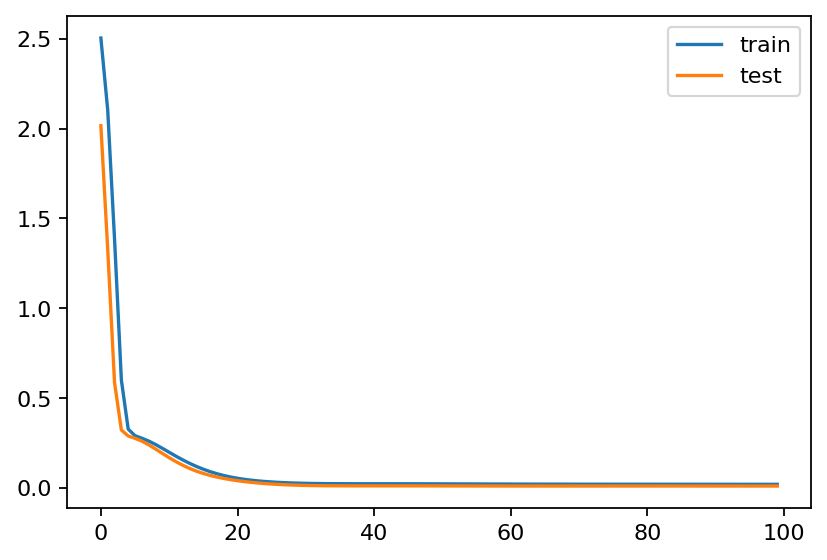

17.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [5]:
# Se mide el tiempo de ejecución
%%timeit -n 1 -r 1

model, history = fit_model(batch_size=800)
evaluate(model, history)

## 3. Gradiente descendente estocástico.

En el gradiente descendente estocástico, una época se considera completa cuando todos los datos de entrenamiento han sido utilizados en la optimización de la red neuronal. En este caso, como en cada iteración se usa una sola muestra, una época se completa en un número de iteraciones igual al tamaño del conjunto de entrenamiento, que en este caso es de 800 iteraciones. Además, dado que el parámetro `epochs` se fija en 100, el entrenamiento de la red se llevará a cabo 80000 iteraciones.

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9693 - loss: 0.1103 - val_accuracy: 0.9950 - val_loss: 0.0087
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0378 - val_accuracy: 0.9950 - val_loss: 0.0073
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9935 - loss: 0.0291 - val_accuracy: 0.9900 - val_loss: 0.0202
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9935 - loss: 0.0280 - val_accuracy: 0.9900 - val_loss: 0.0171
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0365 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9948 - loss: 0.0222 - val_accuracy: 0.9850 - val_loss: 0.0376
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0401 - val_accuracy: 0.9900 - val_loss: 0.0098
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9763 - loss: 0.0806 - val_accu

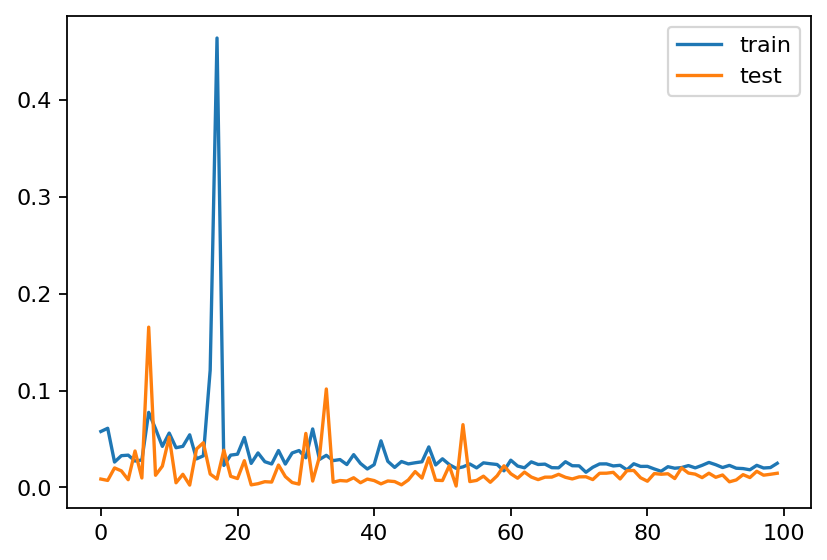

3min 34s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
# Se mide el tiempo de ejecución
%%timeit -n 1 -r 1

model, history = fit_model(batch_size=1)
evaluate(model, history)

## 4. Gradiente descendente por mini-lotes.

Este último enfoque plantea un punto intermedio entre la optimización estocástica y la optimización por lotes. En este algoritmo de optimización por mini-lotes, el conjunto de entrenamiento se divide de forma aleatoria en conjuntos con tamaño `batch_size`. Se debe tener en cuenta que el valor `batch_size` es elegido por el usuario, así que se convierte en un nuevo hiper-parámetro de las redes neuronales.

Siguiendo el análisis de los enfoques anteriores, para el método de gradiente descendente por mini-lotes, una época se completa en $\frac{N}{batch\_size}$ iteraciones, donde $N$ es el tamaño del conjunto de entrenamiento. De esta manera, el entrenamiento se se lleva a cabo en $epochs*\frac{N}{batch\_size}$ iteraciones.

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7693 - loss: 0.4438 - val_accuracy: 0.9950 - val_loss: 0.0139
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9931 - loss: 0.0261 - val_accuracy: 0.9900 - val_loss: 0.0110
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0282 - val_accuracy: 0.9950 - val_loss: 0.0107
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0141 - val_accuracy: 0.9950 - val_loss: 0.0110
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9950 - val_loss: 0.0113
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0191 - val_accuracy: 0.9950 - val_loss: 0.0104
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9950 - val_loss: 0.0100
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0138 - val_accuracy: 0.9950 - 

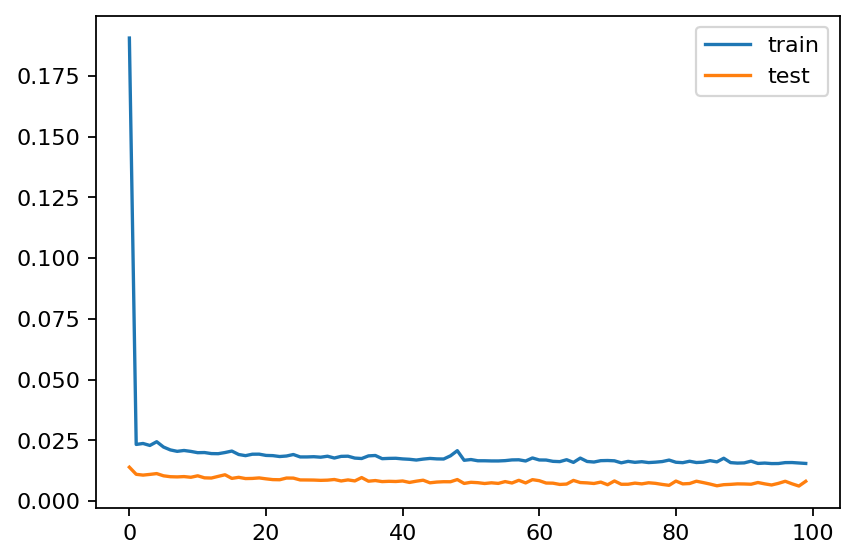

16.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
# Se mide el tiempo de ejecución
%%timeit -n 1 -r 1

model, history = fit_model(batch_size=32)
evaluate(model, history)

## 4. Conclusiones


### 4.1 Gradiente estocástico por lotes.
- Este método usa la totalidad de los datos de entrenamiento en cada iteración.
- Como se nota en los resultados experimentales, la función de pérdida no presenta ruido.
- La cantidad de iteraciones corresponde al parámetro `epochs`. Esta cantidad es la menor comparada con los otros dos enfoques.
- Debido a que cada iteración de la optimización usa todos los datos de entrenamiento, este tipo de algoritmos puede presentar problemas en bases de datos con grandes cantidades de muestras o que contienen datos como imágenes o videos. La cantidad de los datos puede desbordar la memoria de nuestros equipos y simplemente no se podría ejecutar el proceso de entrenamiento.
- Otra desventaja es que dado que la función de pérdida no presenta ruido, este tipo de optimización es propenso a entregar soluciones que no son óptimas, lo cual afecta el rendimiento de las redes neuronales.


### 4.2 Gradiente descendente estocástico.
- Este método usa una única muestra en cada iteración del entrenamiento, lo cual disminuye al máximo la posibilidad de desbordar la memoria, incluso en bases de datos grandes.
- La principal desventaja es el ruido presente en la función de pérdida, lo cual causa que la pérdida pueda cambiar abruptamente de una iteración a otra. Este ruido en la función de pérdida causa que el algoritmo sea propenso a no encontrar la solución óptima.
- Otra desventaja está en el tiempo de ejecución. Este algoritmo debe completar $epochs*N$ iteraciones, lo cual puede incrementar el tiempo de ejecución del algoritmo de optimización.


### 4.3 Gradiente descendente por mini-lotes.
- Este enfoque es un punto intermedio entre los dos enfoques anteriores, no se usan tantas muestras como el gradiente por lotes ni tan pocas muestras como el gradiente estocástico.
- Es el enfoque más usado para el entrenamiento de las redes neuronales. El ruido de la función de pérdida es pequeña, lo cual previene cambios abruptos en la pérdida y que se lleguen a soluciones que no son óptimas. Esto se puede notar en los resultados experimentales, donde el gradiente por mini-lotes obtiene el mejor rendimiento con el menor tiempo de ejecución.
- El gran problema relacionado con este enfoque es que tenemos un nuevo hiper-parámetro por ajustar, el tamaño del mini-lote (`batch_size`). Muchos experimentos en el área del aprendizaje profundo concluyen que la mejor elección es `batch_size` pequeño; de hecho, un buen valor por defecto es `batch_size = 32`.
- Otro hiper-parámetro que hemos usado es el `momentum`. Este hiper-parámetro está relacionado con una modificación del algoritmo de gradiente descendente, que usa los conceptos estadísticos de la media móvil con el fin de disminuir las oscilaciones de la función de pérdida en los enfoques de gradiente estocástico y gradiente por mini-lotes. Un valor de `momentum` cercano a 1 presenta grandes oscilaciones. Por el contrario, un valor cercano a cero aumenta el suavizado de la función de costo; sin embargo, un valor de `momentum` muy pequeño puede llevar a soluciones que no son óptimas. Para más información se recomienda la siguiente [lectura](https://distill.pub/2017/momentum/) (opcional).
- El algoritmo de gradiente descendente ha servido como base a nuevos optimizadores más robustos. Dentro de estos, el más usado en la actualidad es el algoritmo ADAM (adaptive moment estimation).

